In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

b:\Conda\envs\basic3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
b:\Conda\envs\basic3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


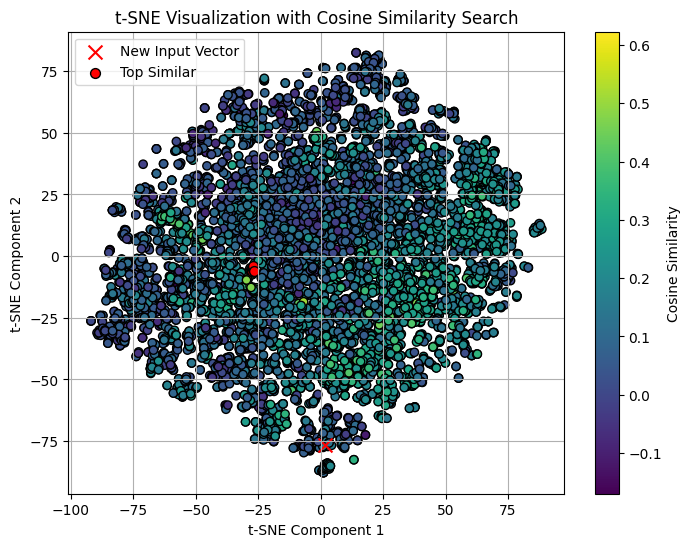

In [23]:
data = np.load('./combined_entity_embeddings.npy')
new_vector = np.load('question.npy')

similarity = cosine_similarity(data, new_vector.reshape(1, -1))

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
data_tsne = tsne.fit_transform(data)

new_vector_tsne = tsne.fit_transform(np.vstack([data, new_vector]))[-1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=similarity.squeeze(), cmap='viridis', marker='o', edgecolor='k')
plt.scatter(new_vector_tsne[0], new_vector_tsne[1], c='red', marker='x', s=100, label='New Input Vector')
top_similarities = np.argsort(similarity.squeeze())[::-1][:5]
for i in top_similarities:
    plt.scatter(data_tsne[i, 0], data_tsne[i, 1], c='red', edgecolor='black', marker='o', s=50, label='Top Similar' if i == top_similarities[0] else '')
plt.colorbar(scatter, label='Cosine Similarity')

plt.title('t-SNE Visualization with Cosine Similarity Search')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

b:\Conda\envs\basic3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


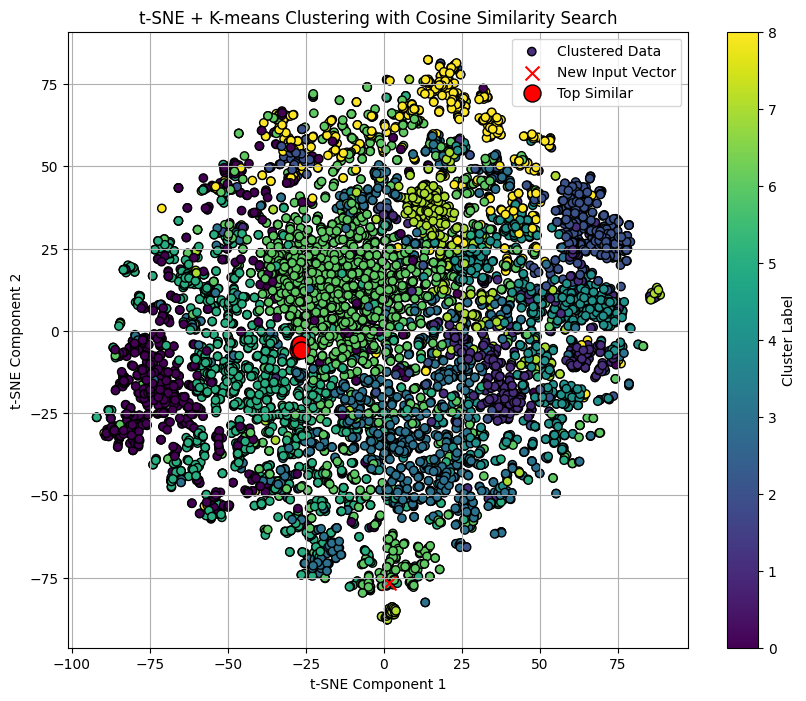

: 

In [25]:
data = np.load('./combined_entity_embeddings.npy')
new_vector = np.load('question.npy')

num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
data_tsne = tsne.fit_transform(data)

similarity = cosine_similarity(data, new_vector.reshape(1, -1))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', label='Clustered Data')
plt.scatter(new_vector_tsne[0], new_vector_tsne[1], c='red', marker='x', s=100, label='New Input Vector')
top_similarities = np.argsort(similarity.squeeze())[::-1][:5]
for i in top_similarities:
    plt.scatter(data_tsne[i, 0], data_tsne[i, 1], c='red', edgecolor='black', marker='o', s=150, label='Top Similar' if i == top_similarities[0] else '')

plt.colorbar(scatter, label='Cluster Label')

plt.title('t-SNE + K-means Clustering with Cosine Similarity Search')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

b:\Conda\envs\basic3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


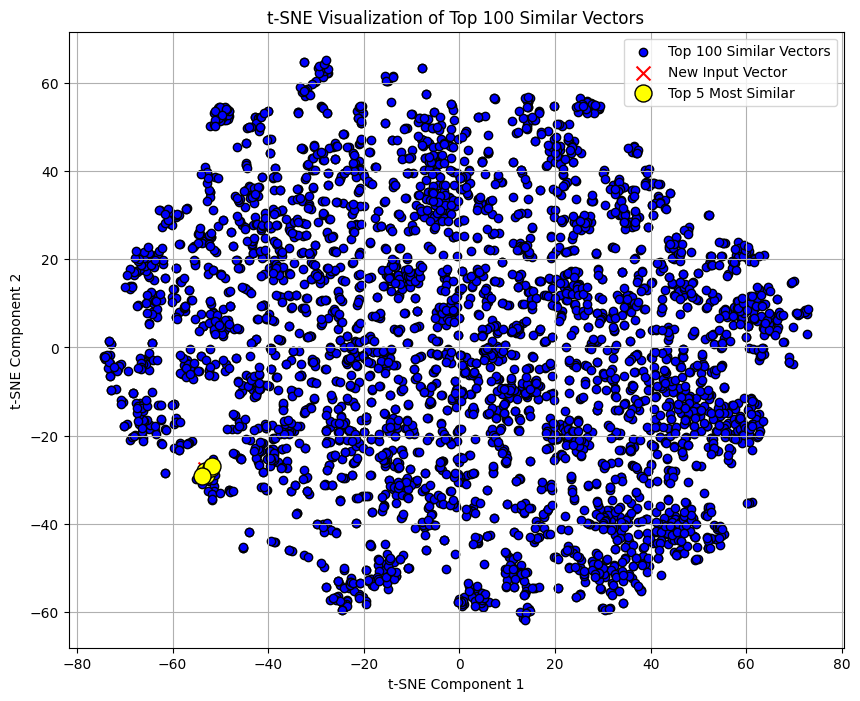

In [ ]:
data = np.load('./combined_entity_embeddings.npy')
new_vector = np.load('question.npy')  # 替换为新输入向量的文件路径

# 2. 计算新向量与所有数据的余弦相似度
similarity = cosine_similarity(data, new_vector.reshape(1, -1)).squeeze()

# 3. 根据相似度提取前100个最相似的向量
top_indices = np.argsort(similarity)[::-1][:8000]  # 从大到小排序，取前100个
top_similar_vectors = data[top_indices]  # 提取前100个最相似的向量

# 4. 将新向量加入到筛选出的100个最相似的向量中
subset_with_new = np.vstack([top_similar_vectors, new_vector])

# 5. 使用 t-SNE 对这101个向量进行降维
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
subset_tsne = tsne.fit_transform(subset_with_new)

# 6. 可视化 t-SNE 降维后的结果
plt.figure(figsize=(10, 8))

top_5_indices = top_indices[:5]

# 绘制前100个最相似向量，使用蓝色标记
plt.scatter(subset_tsne[:-1, 0], subset_tsne[:-1, 1], c='blue', marker='o', edgecolor='k', label='Top 100 Similar Vectors')

# 将新输入向量用红色“×”表示

plt.scatter(subset_tsne[:5, 0], subset_tsne[:5, 1], c='yellow', edgecolor='black', marker='o', s=150, label='Top 5 Most Similar')
plt.scatter(subset_tsne[-1, 0], subset_tsne[-1, 1], c='red', marker='x', s=100, label='New Input Vector')

plt.title('t-SNE Visualization of Top 100 Similar Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

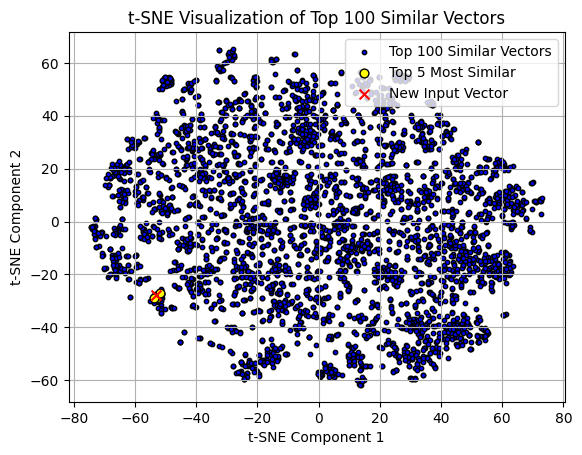

In [7]:
plt.scatter(subset_tsne[:-1, 0], subset_tsne[:-1, 1], c='blue', s=10, marker='o', edgecolor='k', label='Top 100 Similar Vectors')

# 将新输入向量用红色“×”表示

plt.scatter(subset_tsne[:5, 0], subset_tsne[:5, 1], c='yellow', edgecolor='black', marker='o', s=40, label='Top 5 Most Similar')
plt.scatter(subset_tsne[-1, 0], subset_tsne[-1, 1], c='red', marker='x', s=50, label='New Input Vector')

plt.title('t-SNE Visualization of Top 100 Similar Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

b:\Conda\envs\basic3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
b:\Conda\envs\basic3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


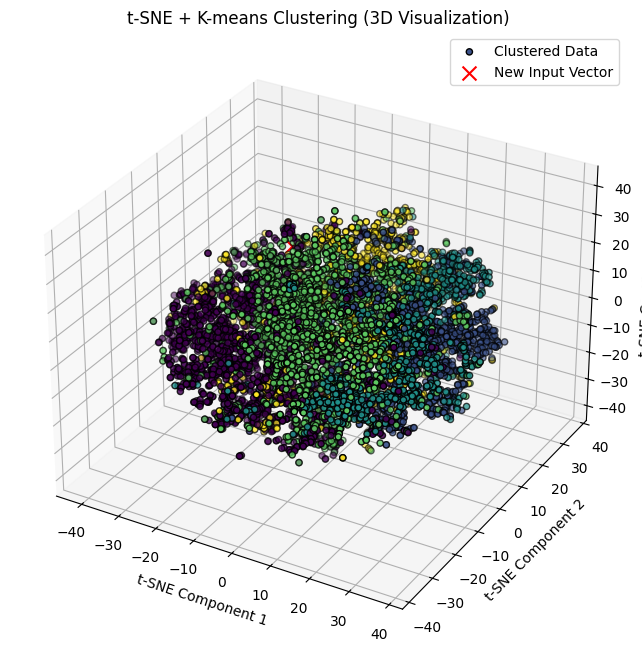

In [20]:
data = np.load('./combined_entity_embeddings.npy')
new_vector = np.load('./question.npy')

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
data_tsne_3d = tsne.fit_transform(data)

data_with_new = np.vstack([data, new_vector])
data_tsne_with_new = tsne.fit_transform(data_with_new)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2], 
                     c=clusters, cmap='viridis', marker='o', edgecolor='k', label='Clustered Data')

ax.scatter(data_tsne_with_new[-1, 0], data_tsne_with_new[-1, 1], data_tsne_with_new[-1, 2], 
           c='red', marker='x', s=100, label='New Input Vector')

plt.title('t-SNE + K-means Clustering (3D Visualization)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.legend()
plt.show()